In [2]:
from gensim.utils import RepeatCorpus
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [3]:
wv = KeyedVectors.load_word2vec_format('./skipgram/skip_gram_v100m8.w2v.txt', binary=False)

# Zadanie 3

In [24]:
wv.most_similar(positive=['sąd::noun', 'wysoki::adj'], topn=1)

[('niski::adj', 0.802047848701477)]

In [5]:
wv.most_similar(positive=['trybunał::noun', 'konstytucyjny::adj'], topn=1)

[('władza_sądownicza::noun', 0.8395407795906067)]

In [6]:
wv.most_similar(positive=['kodeks_cywilny::noun'], topn=1)

[('ne#Kodeksu_cywilnego::noun', 0.9549584984779358)]

In [18]:
wv.most_similar(positive='kpk::noun', topn=1)

[('ne#Kodeksu_postępowania_karnego::noun', 0.8661121129989624)]

In [23]:
wv.most_similar(positive=['sąd::noun', 'rejonowy::adj'], topn=1)

[('sąd_okręgowy::noun', 0.8236082792282104)]

In [10]:
wv.most_similar(positive='szkoda::noun', topn=1)

[('wyrządzić::verb', 0.7564012408256531)]

In [9]:
wv.most_similar(positive='wypadek::noun', topn=1)

[('przypadek::noun', 0.8552334308624268)]

In [11]:
wv.most_similar(positive='kolizja::noun', topn=1)

[('kolizja_drogowa::noun', 0.8072466254234314)]

In [8]:
wv.most_similar(positive=['szkoda_majątkowa::noun'], topn=1)

[('wyrządzić::noun', 0.8379961252212524)]

In [13]:
wv.most_similar(positive='nieszczęście::noun', topn=1)

[('niebezpieczeństwo::noun', 0.7715556025505066)]

In [12]:
wv.most_similar(positive='rozwód::noun', topn=1)

[('małżeństwo::noun', 0.8230220079421997)]

# Zadanie 4

In [37]:
# sąd wysoki - kpc + konstytucja
wv.most_similar(positive=['sąd::noun', 'wysoki::adj', 'konstytucja::noun'], negative=['kpc::noun'], topn=1)
# vector = wv['sąd::noun'] - wv['kpc::noun'] + wv['konstytucja::noun']
# wv.similar_by_vector(vector, topn=1)

[('rząd::noun', 0.7304975986480713)]

In [32]:
# pasażer - mężczyzna + kobieta
vector = wv['pasażer::noun'] - wv['mężczyzna::noun'] + wv['kobieta::noun']
wv.similar_by_vector(vector, topn=5)
# wv.most_similar(positive=['pasażer::noun', 'kobieta::noun'], negative=['mężczyzna::noun'], topn=1)

[('pasażer::noun', 0.9536111950874329),
 ('podróżny::noun', 0.84157395362854),
 ('współpasażer::noun', 0.7920055985450745),
 ('podróżujący::noun', 0.7550979852676392),
 ('kierowca::noun', 0.744685709476471)]

In [38]:
# samochód - droga + rzeka
wv.most_similar(positive=['samochód::noun', 'rzeka::noun'], negative=['droga::noun'], topn=1)
# vector = wv['samochód::noun'] - wv['droga::noun'] + wv['rzeka::noun']
# wv.similar_by_vector(vector, topn=1)

[('motorówka::noun', 0.7439929842948914)]

# Zadanie 5

In [ ]:
szkoda
strata
uszczerbek
szkoda majątkowy
uszczerbek na zdrowie
krzywda
niesprawiedliwość
nieszczęście

In [42]:
import random

result = []
color = [50] * 1007
for i in range(7):
    color[i] = 100
result.append(wv['szkoda::noun'])
result.append(wv['strata::noun'])
result.append(wv['uszczerbek::noun'])
result.append(wv['szkoda_majątkowa::noun'])
result.append(wv['Krzywda::noun'])
result.append(wv['niesprawiedliwość::noun'])
result.append(wv['nieszczęście::noun'])

rand_items = random.sample(list(wv.vocab.keys()), 1000)

for element in rand_items:
    result.append(wv[element])

In [34]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets

In [35]:
tsne = manifold.TSNE(n_components=2)
tsne_y = tsne.fit_transform(result)

<IPython.core.display.Javascript object>


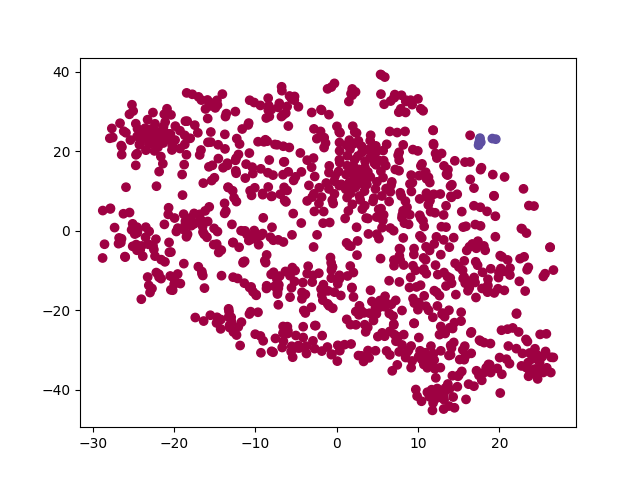

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tsne_y[:, 0], tsne_y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.show()